In [84]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [85]:
# 데이터 불러오기
df = pd.read_excel('./2019_data_preprocess.xlsx')
df.head()

,자치구,십만명당_범죄발생건수,면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수,인구당_반려동물수,행복지수
0,강남구,1327.495552,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051,0.235,0.701
1,강동구,911.464838,0.691338,0.244002,42.740952,14.802765,5.042700,15.860106,304.066694,13.460756,0.203,0.640
2,강북구,1208.076929,0.635593,0.211864,28.855932,11.271186,3.474576,19.110169,183.855932,11.525424,0.188,0.711
3,강서구,823.035638,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625,0.198,0.672
4,관악구,1029.895580,0.676361,0.169090,37.368955,14.541765,3.719986,16.300304,179.370984,13.933040,0.171,0.714


## R^2, p-value

In [86]:
## 결정계수(R^2)와 유의확률(p-value)을 활용한 다중공선성 확인

# 데이터 불러오기
df = pd.read_excel('./2020_data_preprocess.xlsx')
df1 = df.copy()

# 문자로 된 column 제거
df1 = df1.drop('자치구', axis = 1)
df1.columns

# ols에 사용할 변수 생성
x_data_full = df1[['면적당_경찰관서_수', '면적당_소방관서_수', '면적당_카페_수', '면적당_편의점_수',
       '면적당_공원_수', '면적당_버스정류장_수', '면적당_가로등_수', '면적당_ATM_수', '인구당_반려동물수',
       '행복지수']] # 변수 여러개(다중 선형회귀분석)
x_data4 = df1[['면적당_카페_수', '면적당_편의점_수', '면적당_공원_수', '면적당_ATM_수']]
target = df1[['십만명당_범죄발생건수']]

# 상수항 추가
x_data_full_ = sm.add_constant(x_data_full, has_constant = "add")
x_data4_ = sm.add_constant(x_data4, has_constant = "add")

# ols 적용 후 fit() 메서드로 학습
result_pvalue = sm.OLS(target, x_data_full_).fit()
result_predict1 = sm.OLS(target, x_data4_).fit()

# 결과 print
print('회귀계수(parameter) : ', result_predict1.params)
print('유의확률(p-value) : ', result_predict1.pvalues)
print('결정계수(R-requared) : ', result_predict1.rsquared)
print('각 독립변수의 범죄발생건수 예측 : ', result_predict1.predict())
result_predict1.summary() # 최종결과

회귀계수(parameter) :  const        1206.617721
면적당_카페_수       12.616417
면적당_편의점_수    -144.382242
면적당_공원_수     -141.794744
면적당_ATM_수     131.967130
dtype: float64
유의확률(p-value) :  const        0.000005
면적당_카페_수     0.000003
면적당_편의점_수    0.000066
면적당_공원_수     0.002538
면적당_ATM_수    0.000012
dtype: float64
결정계수(R-requared) :  0.8431025149084912
각 독립변수의 범죄발생건수 예측 :  [1422.77379368  664.18159864  959.60097598  942.25002013  875.35051723
  927.83180796  837.77785898 1279.50780847  657.95402038  765.21380832
  908.68588047  635.77112325 1199.31488549  842.16325623 1049.32504804
  956.36897249  833.89266934  982.0272098   668.39849589 1062.593652
 1136.90154737  904.76418838 1601.19791949 2494.12504499  673.64730369]


C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            십만명당_범죄발생건수   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     26.87
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           8.53e-08
Time:                        18:48:53   Log-Likelihood:                -163.17
No. Observations:                  25   AIC:                             336.3
Df Residuals:                      20   BIC:                             342.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1206.6177    196.255      6.148      0.000     797.237    1615.999
면적당_카페_수      12.6164      1.992      6.335      0.000       8.462      16.771
면적당_편의점_수   -144.3822     28.793     -5.014      0.000    -204.444     -84.321
면적당_공원_수    -141.7947     41.114     -3.449      0.003    -227.556     -56.033
면적당_ATM_수    131.9671     22.795      5.789      0.000      84.417     179.517
==============================================================================
Omnibus:                        1.229   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.541   Jarque-Bera (JB):                0.905
Skew:                           0.131   Prob(JB):                        0.636
Kurtosis:                       2.106   Cond. No.                         367.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
## 결정계수(R^2)와 유의확률(p-value)을 활용한 다중공선성 확인
## 값이 튀는 중구, 종로구 제거

# 데이터 불러오기
df2 = df.copy()

# 중구, 종로구 제거
df2 = df2.drop(index =[22, 23])
df2.columns

# ols에 사용할 변수 생성
x_data_full_2 = df2[['면적당_경찰관서_수', '면적당_소방관서_수', '면적당_카페_수', '면적당_편의점_수',
       '면적당_공원_수', '면적당_버스정류장_수', '면적당_가로등_수', '면적당_ATM_수', '인구당_반려동물수',
       '행복지수']] # 변수 여러개(다중 선형회귀분석)
x_data4_2 = df2[['면적당_카페_수', '면적당_편의점_수', '면적당_공원_수', '면적당_ATM_수']]
target_2 = df2[['십만명당_범죄발생건수']]

# 상수항 추가
x_data_full_2_ = sm.add_constant(x_data_full_2, has_constant = "add")
x_data4_2_ = sm.add_constant(x_data4_2, has_constant = "add")

# ols 적용 후 fit() 메서드로 학습
result_pvalue2 = sm.OLS(target_2, x_data_full_2_).fit()
result_predict2 = sm.OLS(target_2, x_data4_2_).fit()

# 결과 print
print('절편과 기울기 : ', result_pvalue.params)
print('유의확률 : ', result_pvalue.pvalues)
print('결정계수 : ', result_pvalue.rsquared)
print('각 독립변수의 범죄발생건수 예측 : ', result_pvalue.predict())
result_pvalue.summary()

절편과 기울기 :  const          1196.286146
면적당_경찰관서_수      190.029721
면적당_소방관서_수     1059.199721
면적당_카페_수         10.588942
면적당_편의점_수      -123.980165
면적당_공원_수       -200.001656
면적당_버스정류장_수      -8.975841
면적당_가로등_수         0.659947
면적당_ATM_수        94.530122
인구당_반려동물수      1890.260429
행복지수           -250.574313
dtype: float64
유의확률 :  const          0.357772
면적당_경찰관서_수     0.421303
면적당_소방관서_수     0.219159
면적당_카페_수       0.000158
면적당_편의점_수      0.001611
면적당_공원_수       0.003970
면적당_버스정류장_수    0.402079
면적당_가로등_수      0.451622
면적당_ATM_수      0.007076
인구당_반려동물수      0.408654
행복지수           0.875445
dtype: float64
결정계수 :  0.9101908656064471
각 독립변수의 범죄발생건수 예측 :  [1349.93513893  795.96252946  966.51911192  853.23875728  777.10602806
  996.22249531  902.61738603 1042.01414911  658.6587494   826.02068434
 1019.63586604  785.51760224 1041.55911908  586.09507638 1113.65916407
  948.2999488   770.46319718  983.01786849  707.79920011 1123.31994694
 1214.37521581  792.03449608 1728.81659304 2576.45905417  

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            십만명당_범죄발생건수   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     14.19
Date:                Tue, 01 Mar 2022   Prob (F-statistic):           1.12e-05
Time:                        18:48:53   Log-Likelihood:                -156.19
No. Observations:                  25   AIC:                             334.4
Df Residuals:                      14   BIC:                             347.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1196.2861   1258.025      0.951      0.358   -1501.909    3894.482
면적당_경찰관서_수    190.0297    229.374      0.828      0.421    -301.928     681.987
면적당_소방관서_수   1059.1997    823.361      1.286      0.219    -706.734    2825.134
면적당_카페_수       10.5889      2.071      5.113      0.000       6.147      15.031
면적당_편의점_수    -123.9802     31.812     -3.897      0.002    -192.211     -55.749
면적당_공원_수     -200.0017     58.111     -3.442      0.004    -324.638     -75.365
면적당_버스정류장_수    -8.9758     10.387     -0.864      0.402     -31.254      13.302
면적당_가로등_수       0.6599      0.852      0.774      0.452      -1.168       2.488
면적당_ATM_수      94.5301     29.999      3.151      0.007      30.188     158.872
인구당_반려동물수    1890.2604   2219.109      0.852      0.409   -2869.255    6649.775
행복지수         -250.5743   1569.616     -0.160      0.875   -3617.067    3115.918
==============================================================================
Omnibus:                        1.454   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.483   Jarque-Bera (JB):                1.322
Skew:                           0.490   Prob(JB):                        0.516
Kurtosis:                       2.445   Cond. No.                     2.79e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.79e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [88]:
# 실제값과 predict 예측값 차이
# '모든 구 포함 예측값'과 '중구, 종로구 제거 후 예측값' 비교

df1['각_독립변수의_십만명당_범죄발생건수_예측결과'] = result_predict1.predict()
df1['실제값_예측값_차이값'] = abs(df1['십만명당_범죄발생건수'] - df1['각_독립변수의_십만명당_범죄발생건수_예측결과'])
print('실제값 - 예측값 : ', df1['실제값_예측값_차이값'].sum())

df2['각_독립변수의_십만명당_범죄발생건수_예측결과'] = result_predict2.predict()
df2['실제값_예측값_차이값'] = abs(df2['십만명당_범죄발생건수'] - df2['각_독립변수의_십만명당_범죄발생건수_예측결과'])
print('실제값 - 예측값 (중구, 종로구 제거) : ', df2['실제값_예측값_차이값'].sum())

실제값 - 예측값 :  3531.726538013
실제값 - 예측값 (중구, 종로구 제거) :  2563.2092635165272


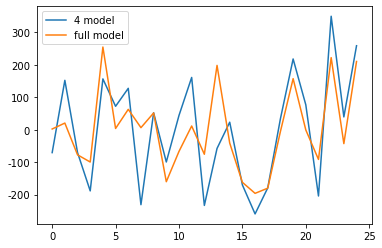

In [89]:
# 4개 모델과 full모델의 잔차비교

import matplotlib.pyplot as plt
result_predict1.resid.plot(label = "4 model")
result_pvalue.resid.plot(label = "full model")
plt.legend()

## 상관계수, 산점도

In [90]:
df_data = df[['면적당_경찰관서_수', '면적당_소방관서_수', '면적당_카페_수',
       '면적당_편의점_수', '면적당_공원_수', '면적당_버스정류장_수', '면적당_가로등_수', '면적당_ATM_수',
       '인구당_반려동물수', '행복지수']]

# 상관계수
df_data.corr()

,면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수,인구당_반려동물수,행복지수
면적당_경찰관서_수,1.000000,0.830188,0.575606,0.780184,0.619809,0.445502,0.813462,0.826814,-0.202299,-0.196832
면적당_소방관서_수,0.830188,1.000000,0.674111,0.745792,0.730323,0.283407,0.872070,0.780779,-0.287173,-0.368434
면적당_카페_수,0.575606,0.674111,1.000000,0.762555,0.471599,0.167619,0.708716,0.714754,0.005976,-0.041529
면적당_편의점_수,0.780184,0.745792,0.762555,1.000000,0.545640,0.408207,0.851974,0.966443,-0.020456,-0.168107
면적당_공원_수,0.619809,0.730323,0.471599,0.545640,1.000000,0.421045,0.717378,0.560817,-0.327962,-0.308373
면적당_버스정류장_수,0.445502,0.283407,0.167619,0.408207,0.421045,1.000000,0.252376,0.346807,0.016587,-0.083894
면적당_가로등_수,0.813462,0.872070,0.708716,0.851974,0.717378,0.252376,1.000000,0.894241,-0.135792,-0.290730
면적당_ATM_수,0.826814,0.780779,0.714754,0.966443,0.560817,0.346807,0.894241,1.000000,-0.127343,-0.209614
인구당_반려동물수,-0.202299,-0.287173,0.005976,-0.020456,-0.327962,0.016587,-0.135792,-0.127343,1.000000,0.131144
행복지수,-0.196832,-0.368434,-0.041529,-0.168107,-0.308373,-0.083894,-0.290730,-0.209614,0.131144,1.000000


In [91]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44288 missing from c

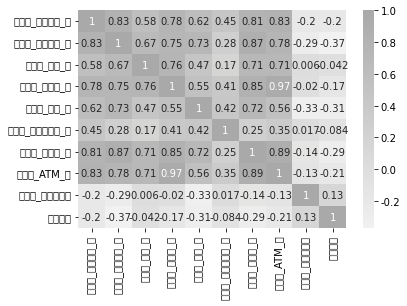

In [92]:
# 코랩 나눔고딕 font 다운로드
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False # '-' 기호 깨지는거 방지

# 상관행렬 시각화
import seaborn as sns
plt.rc('font', family='NanumBarunGothic') 
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(df_data.corr(), annot = True, cmap = cmap)
plt.show()

In [93]:
sns.pairplot(df_data)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44288 missing from c

KeyboardInterrupt: 

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 47732 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 51201 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 45817 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44221 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 52272 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 44288 missing from c

Error in callback <function flush_figures at 0x000001E3D6F59DC0> (for post_execute):



KeyboardInterrupt



## 시각화, MSE

In [94]:
# 데이터 불러오기
df = pd.read_excel('./2019_data_preprocess.xlsx')
df.head()

,자치구,십만명당_범죄발생건수,면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수,인구당_반려동물수,행복지수
0,강남구,1327.495552,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051,0.235,0.701
1,강동구,911.464838,0.691338,0.244002,42.740952,14.802765,5.042700,15.860106,304.066694,13.460756,0.203,0.640
2,강북구,1208.076929,0.635593,0.211864,28.855932,11.271186,3.474576,19.110169,183.855932,11.525424,0.188,0.711
3,강서구,823.035638,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625,0.198,0.672
4,관악구,1029.895580,0.676361,0.169090,37.368955,14.541765,3.719986,16.300304,179.370984,13.933040,0.171,0.714


In [95]:
# 원본파일 보존
df1 = df.copy()

# 문자로 된 column 제거
df1 = df1.drop('자치구', axis = 1)
df1.head()

,십만명당_범죄발생건수,면적당_경찰관서_수,면적당_소방관서_수,면적당_카페_수,면적당_편의점_수,면적당_공원_수,면적당_버스정류장_수,면적당_가로등_수,면적당_ATM_수,인구당_반려동물수,행복지수
0,1327.495552,0.582278,0.177215,87.468354,20.329114,3.924051,13.898734,349.063291,19.924051,0.235,0.701
1,911.464838,0.691338,0.244002,42.740952,14.802765,5.042700,15.860106,304.066694,13.460756,0.203,0.640
2,1208.076929,0.635593,0.211864,28.855932,11.271186,3.474576,19.110169,183.855932,11.525424,0.188,0.711
3,823.035638,0.313707,0.168919,33.759653,12.500000,4.102317,14.575290,215.226834,12.982625,0.198,0.672
4,1029.895580,0.676361,0.169090,37.368955,14.541765,3.719986,16.300304,179.370984,13.933040,0.171,0.714


In [96]:
df1.columns

Index(['십만명당_범죄발생건수', '면적당_경찰관서_수', '면적당_소방관서_수', '면적당_카페_수', '면적당_편의점_수',
       '면적당_공원_수', '면적당_버스정류장_수', '면적당_가로등_수', '면적당_ATM_수', '인구당_반려동물수',
       '행복지수'],
      dtype='object')

In [131]:
# 학습 검증데이터 분할
from sklearn.model_selection import train_test_split

X = x_data_full_
y = target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 8)
# 학습데이터와 검증데이터를 7:3으로 분리
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(17, 11) (8, 11) (17, 1) (8, 1)


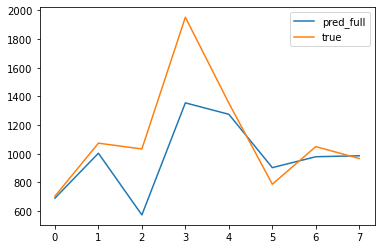

In [132]:
# train_x에 상수항 추가 후 회귀모델 적합
fit_train1 = sm.OLS(train_y, train_x).fit()

# 검증데이터에 대한 예측값과 실제값 비교
plt.plot(np.array(fit_train1.predict(test_x)),label = "pred_full")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

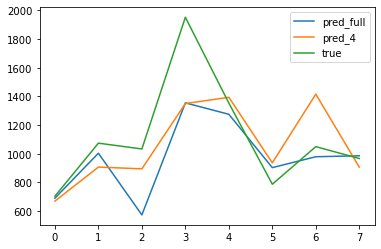

In [133]:
# fit_train1(모든 변수 포함) 데이터와 fit_train2(4개 변수만 포함) 데이터 비교하기
X = x_data4_
y = target

train_x2,test_x2,train_y2,test_y2 = train_test_split(X,y,train_size=0.7, test_size=0.3, random_state = 8)

# train_x2에 상수항 추가 후 회귀모델 적합
fit_train2 = sm.OLS(train_y2, train_x2).fit()

# 검증데이터에 대한 예측값과 실제값 비교
plt.plot(np.array(fit_train1.predict(test_x)),label = "pred_full")
plt.plot(np.array(fit_train2.predict(test_x2)),label = "pred_4")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

In [134]:
from sklearn.metrics import mean_squared_error

# 변수 제거가 이루어지지 않은 full모델
mse1 = mean_squared_error(y_true = test_y["십만명당_범죄발생건수"], y_pred = fit_train1.predict(test_x))

# 4개 변수만 포함한 모델
mse2 = mean_squared_error(y_true = test_y2["십만명당_범죄발생건수"], y_pred = fit_train2.predict(test_x2))

print(mse1)
print(mse2)

74830.9383216095
71551.32112510534
